# Tutorial

## 1. Data Source

### 1.1 Main data source
The provided data source is DATA IMPORTACIONS. It contains data from 14 countries with several csv files in each country's file. 

### 1.2 Additional data source
We collected some additional data sources to support our research on the main dataset.
* ctry_new.csv: Transforms country names in chaos to formal English names of countries, with longitude and latitude of the country.
* peru_port.csv: Since we don't have the column of country of shipment in Peru's data. We construct the column by transforming the port of shipment according to the location of the ports.
* HS code.csv: Contains information of HS_6 and keywords from meaning of the category.

## 2. Data

### 2.1 Promed_data.csv
Promed_data.csv first aggregated data from each country and write it into csv files. Then read in those csv files to construct a large dataset with important variables.
* POSICION ARANCELARIA: Harmonized System (HS) Codes, a standardized numerical method of classifying traded products which are commonly used throughout the export process for goods
* HS_4: The first 4 digit of HS code
* HS_6: The first 6 digit of HS code
* keyword: Categories of merchandise based on the first 6 digit of HS code
* PAIS: The import country
* PAIS DE ORIGEN: Country of manufacture
* PAIS DE PROCEDENCIA: Country of shipment
* FECHA: Date of dispatch
* FOB: FOB value of the transaction
* CIF: CIF value of the transaction
* CANTIDAD: Number of unit of merchandise
* RAZON SOCIAL: The name of the importer
* Longitude Ori: the longitude of the export country(Pais De Origen)
* Longitude Pro: the longitude of the manufacutre country(Pais De Procedencia)
* Longitude Pais: the longitude of the import country(Pais)
* Latitude Ori: the latitude of the export country(Pais De Origen)
* Latitude Pro: the latitude of the manufacutre country(Pais De Procedencia)
* Latitude Pais: the latitude of the import country(Pais)

Following table shows the first 5 rows of Promed_data.

In [1]:
import os
import pandas as pd
os.chdir("C:\\Users\\labbi\\OneDrive\\Liz\\Brandeis\\Promed\\DATA IMPORTACIONES")
Promed_data = pd.read_csv('Promed_data.csv',low_memory=False)
Promed_data.head()

,CANTIDAD,CIF,DESCRIPCION POSICION,FECHA,FOB,HS_4,HS_6,PAIS,PAIS DE ORIGEN,PAIS DE PROCEDENCIA,POSICION ARANCELARIA,RAZON SOCIAL,keyword,latitude_ori,longitude_ori,latitude_pro,longitude_pro,latitude_pais,longitude_pais
0,1.0,57.52,AntiofÃ­dicos y otros antivenenosos,2016-01-22,54.88,3002,3002.1,ARGENTINA,UNITED STATES,UNITED STATES,3002.10.11.000V,BECTON DICKINSON ARGENTINA S R L,Human blood or antisera products,37.09024,-95.712891,37.09024,-95.712891,-38.416097,-63.616672
1,1.0,123.86,AntiofÃ­dicos y otros antivenenosos,2016-01-22,118.18,3002,3002.1,ARGENTINA,UNITED STATES,UNITED STATES,3002.10.11.000V,BECTON DICKINSON ARGENTINA S R L,Human blood or antisera products,37.09024,-95.712891,37.09024,-95.712891,-38.416097,-63.616672
2,2.0,117.60,AntiofÃ­dicos y otros antivenenosos,2016-03-09,109.76,3002,3002.1,ARGENTINA,UNITED STATES,UNITED STATES,3002.10.11.000V,BECTON DICKINSON ARGENTINA S R L,Human blood or antisera products,37.09024,-95.712891,37.09024,-95.712891,-38.416097,-63.616672
3,1.0,126.61,AntiofÃ­dicos y otros antivenenosos,2016-03-09,118.18,3002,3002.1,ARGENTINA,UNITED STATES,UNITED STATES,3002.10.11.000V,BECTON DICKINSON ARGENTINA S R L,Human blood or antisera products,37.09024,-95.712891,37.09024,-95.712891,-38.416097,-63.616672
4,420000.0,3082.72,Accesorios de los tipos utilizados en lÃ­neas ...,2015-06-12,2949.82,3926,3926.9,ARGENTINA,ITALY,ITALY,3926.90.50.000N,DISMEQUI SRL,Other articles,41.87194,12.567380,41.87194,12.567380,-38.416097,-63.616672


### 2.2 Promed_unit.csv
Promed_unit.csv shows the unit price of each merchandise(unique HS code) in 12 countries, except for Honduras and Rep.Dominicana, since these two country don't have unit(cantidad) in the dataset.
* POSICION ARANCELARIA: Harmonized System (HS) Codes, a standardized numerical method of classifying traded products which are commonly used throughout the export process for goods
* HS_4: The first 4 digit of HS code
* HS_6: The first 6 digit of HS code
* keyword: Categories of merchandise based on the first 6 digit of HS code
* PAIS: The import country
* unit_fob: Unit FOB value of the transaction
* unit_cif: Unit CIF value of the transaction
* diff_unit_cif_fob: difference between unit_cif and unit_fob

Following table shows the first 5 rows of Promed_unit.

In [4]:
Promed_unit = pd.read_csv('Promed_unit_price.csv',low_memory=False)
Promed_unit.head()

,PAIS,POSICION ARANCELARIA,unit_cif,unit_fob,diff_unit_cif_fob,CANTIDAD,HS_4,HS_6,keyword
0,MEXICO,3002.10.10,14677.210410,NaN,NaN,37172.08,3002,3002.1,Human blood or antisera products
1,BOLIVIA,3002.10.11.000,409.396747,393.388143,16.008604,2097.16,3002,3002.1,Human blood or antisera products
2,BOLIVIA,3002.10.12.000,208.854668,200.456472,8.398196,443.00,3002,3002.1,Human blood or antisera products
3,BOLIVIA,3002.10.13.000,6358.774946,6177.465571,181.309375,454.53,3002,3002.1,Human blood or antisera products
4,BOLIVIA,3002.10.19.000,4707.351409,4364.557465,342.793944,2053.51,3002,3002.1,Human blood or antisera products


## 3.Codes

### 3.1 Promed_data.py
This code first aggregates data from each country and write them into COUNTRY_NAME.csv.The code then combines those csv files into one big dataframe and write it into Promed_data.csv. 

#### 3.1.1 Notes
1. csv files should be included in files named with country in capital, such as AGENTINA, BOLIVIA, etc.
2. Run the whole Promed_data.py, ignore warning

#### 3.1.2 Functions
The python code contains following functions:
* count_col(country): counts number of columns for csv file
* check_col(country,ncol)：checks whether columns are aligned
* load_data(country,ncol)：aggregates data for each country
* bolivia_curreny(year, currency): converts bolivia currency into USD
* chile_port(data): converts Chile's port of shipment to country of shipment
* ex_rate(cur,year): attains the average exchange rate for a certain year
* chile_currency(data): converts chile FOB/CIF value into USD
* transform(data, country): transforms data for each country accordingly
* diff(list1, list2): finds elements that exist in list1 but don't exist in list2
* aggregate_data(country, select_var): aggregates all data of selected variables

### 3.2 Promed_unit.py
This code generates unit price for every merchandise from Promed_data.

#### 3.2.1 Notes
1.transaction records with cantidad equals to 0 or with no variable that indicates unit would not include in calculating the unit price.

#### 3.2.2 Functions
The python code contains following functions:
* unit_price_cal(Promed_data): calculate unit price from Promed data
* add_hs_code(Promed_data): add HS code and keyword

## 4. Update Data File for Tableau Workbook

If you are connected to a data source that has been modified, you can follow the steps shown below：

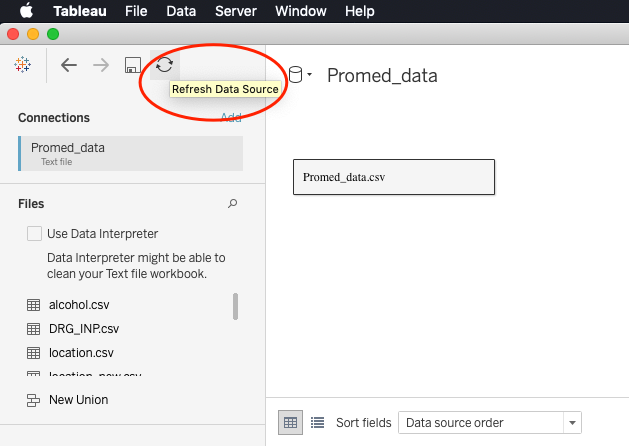

In [1]:
from IPython.display import Image
Image(filename='refresh data.png',width=400, height=400)

## 5. Replace Data File for Tableau Workbook

### 5.1 Create New Data Source

Click the 'Data Source' Tab in the bottom to go to the data source page. Then click 'Data'->'New Data Source'->'More' to select the updated version of data source you would like to use in your computer.

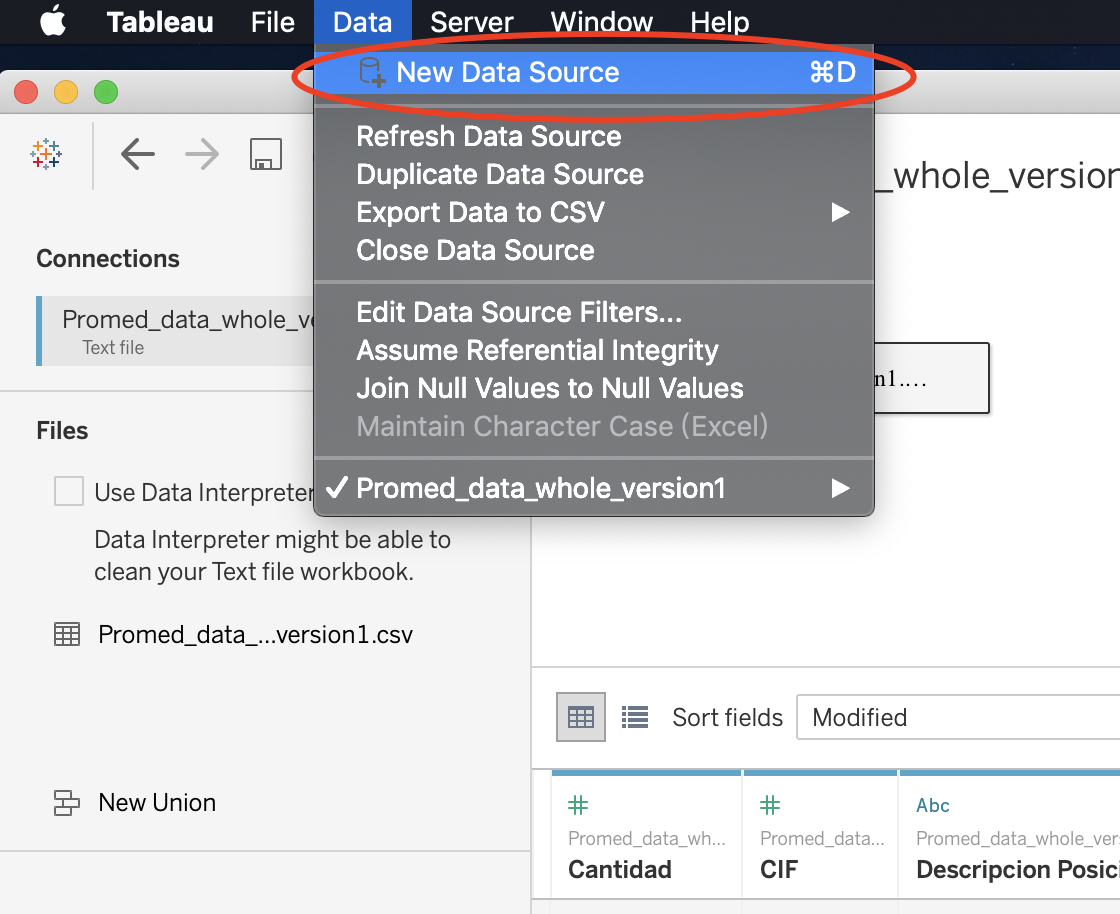

In [2]:
from IPython.display import Image
Image(filename='step1.png',width=400, height=400)

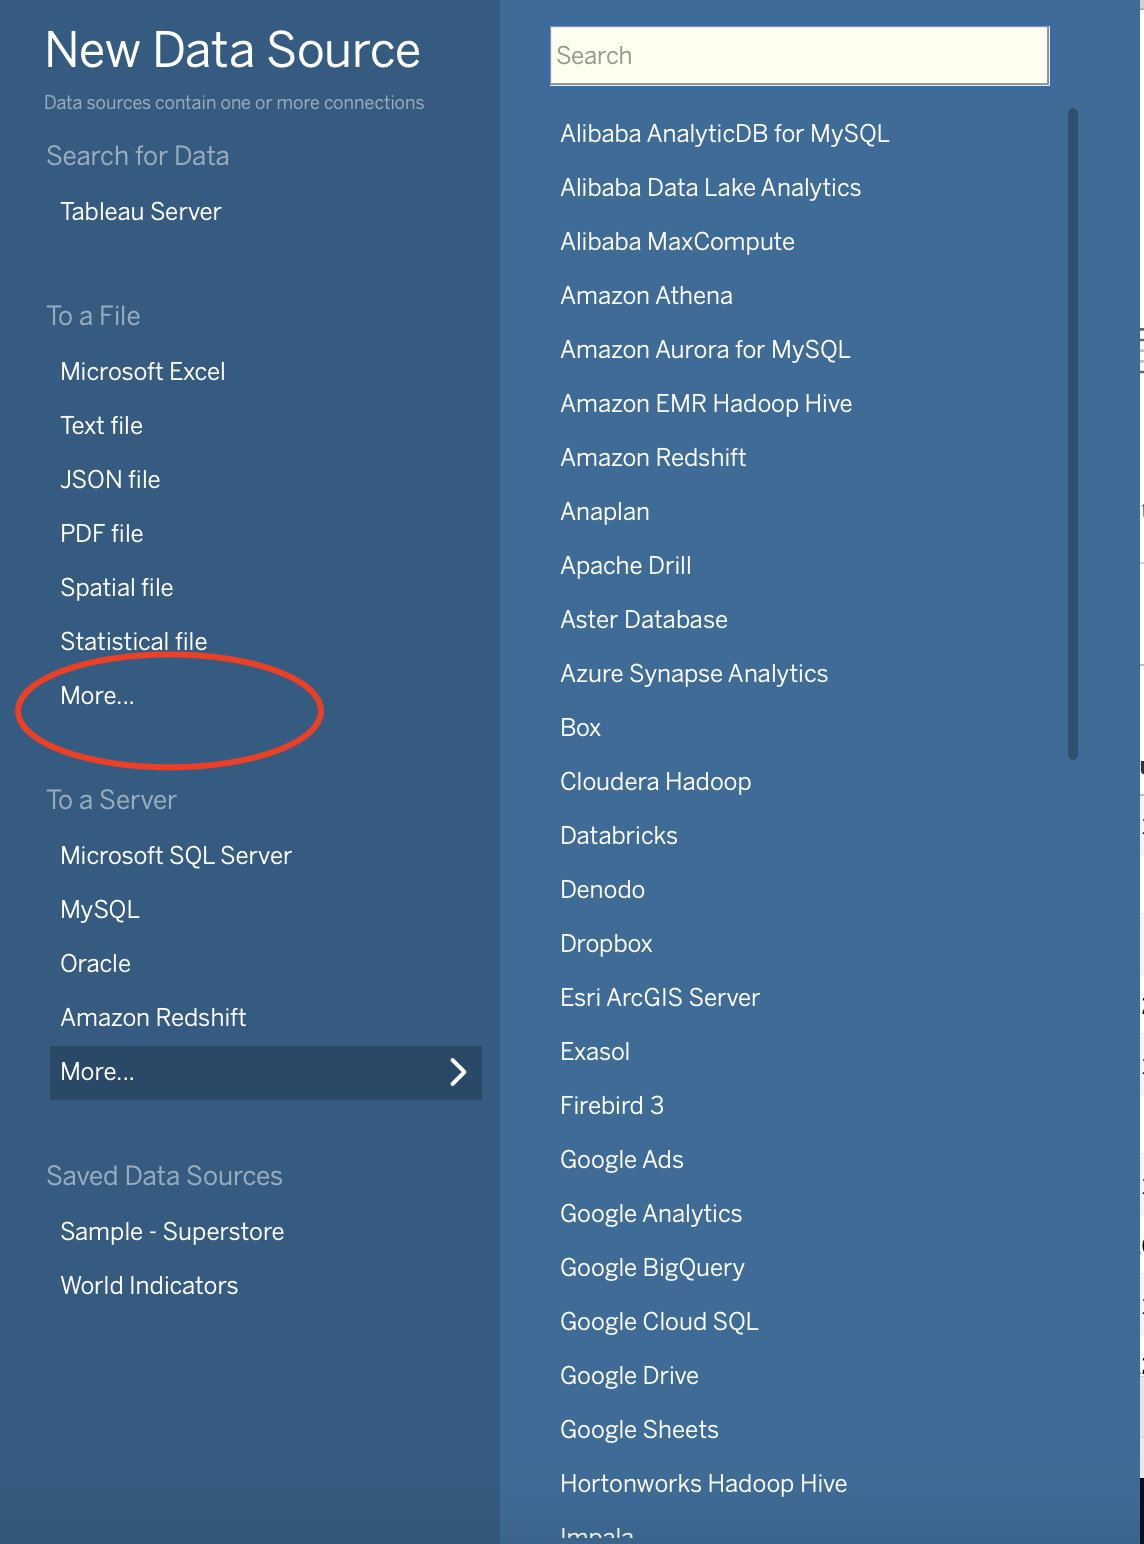

In [3]:
Image(filename='step2.png',width=400, height=400)

### 5.2 Replace the old data with new one 

Now, assume the new data file is called 'Promed_data-2' and by following the steps above, the file is successfully added to the workbook. 
Then, click the 'New Worksheet' button circled in red, you will get a new blank worksheet.

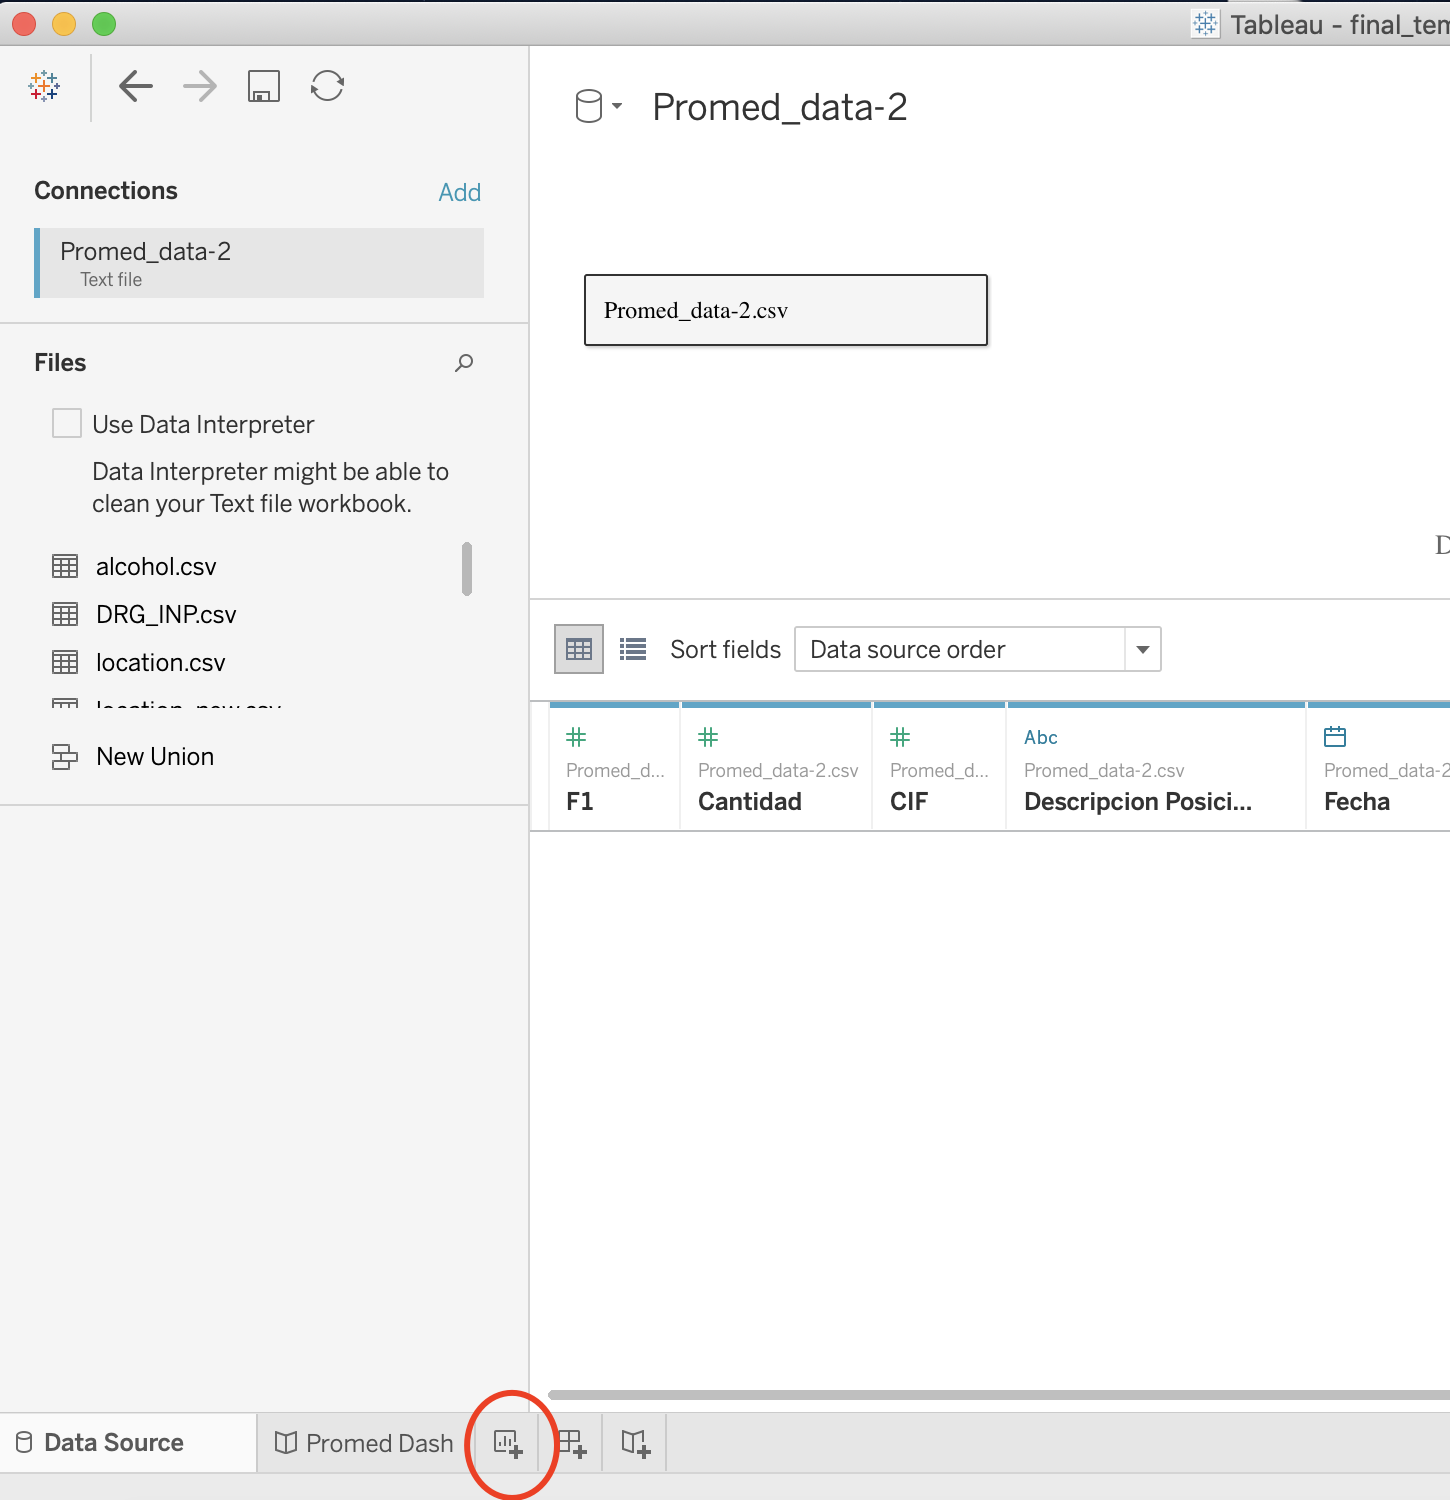

In [4]:
Image(filename='step3.png',width=400, height=400)

Go to the newly added worksheet(sheet 22 in the example), Click 'Data' ->'Replace Data Source'.

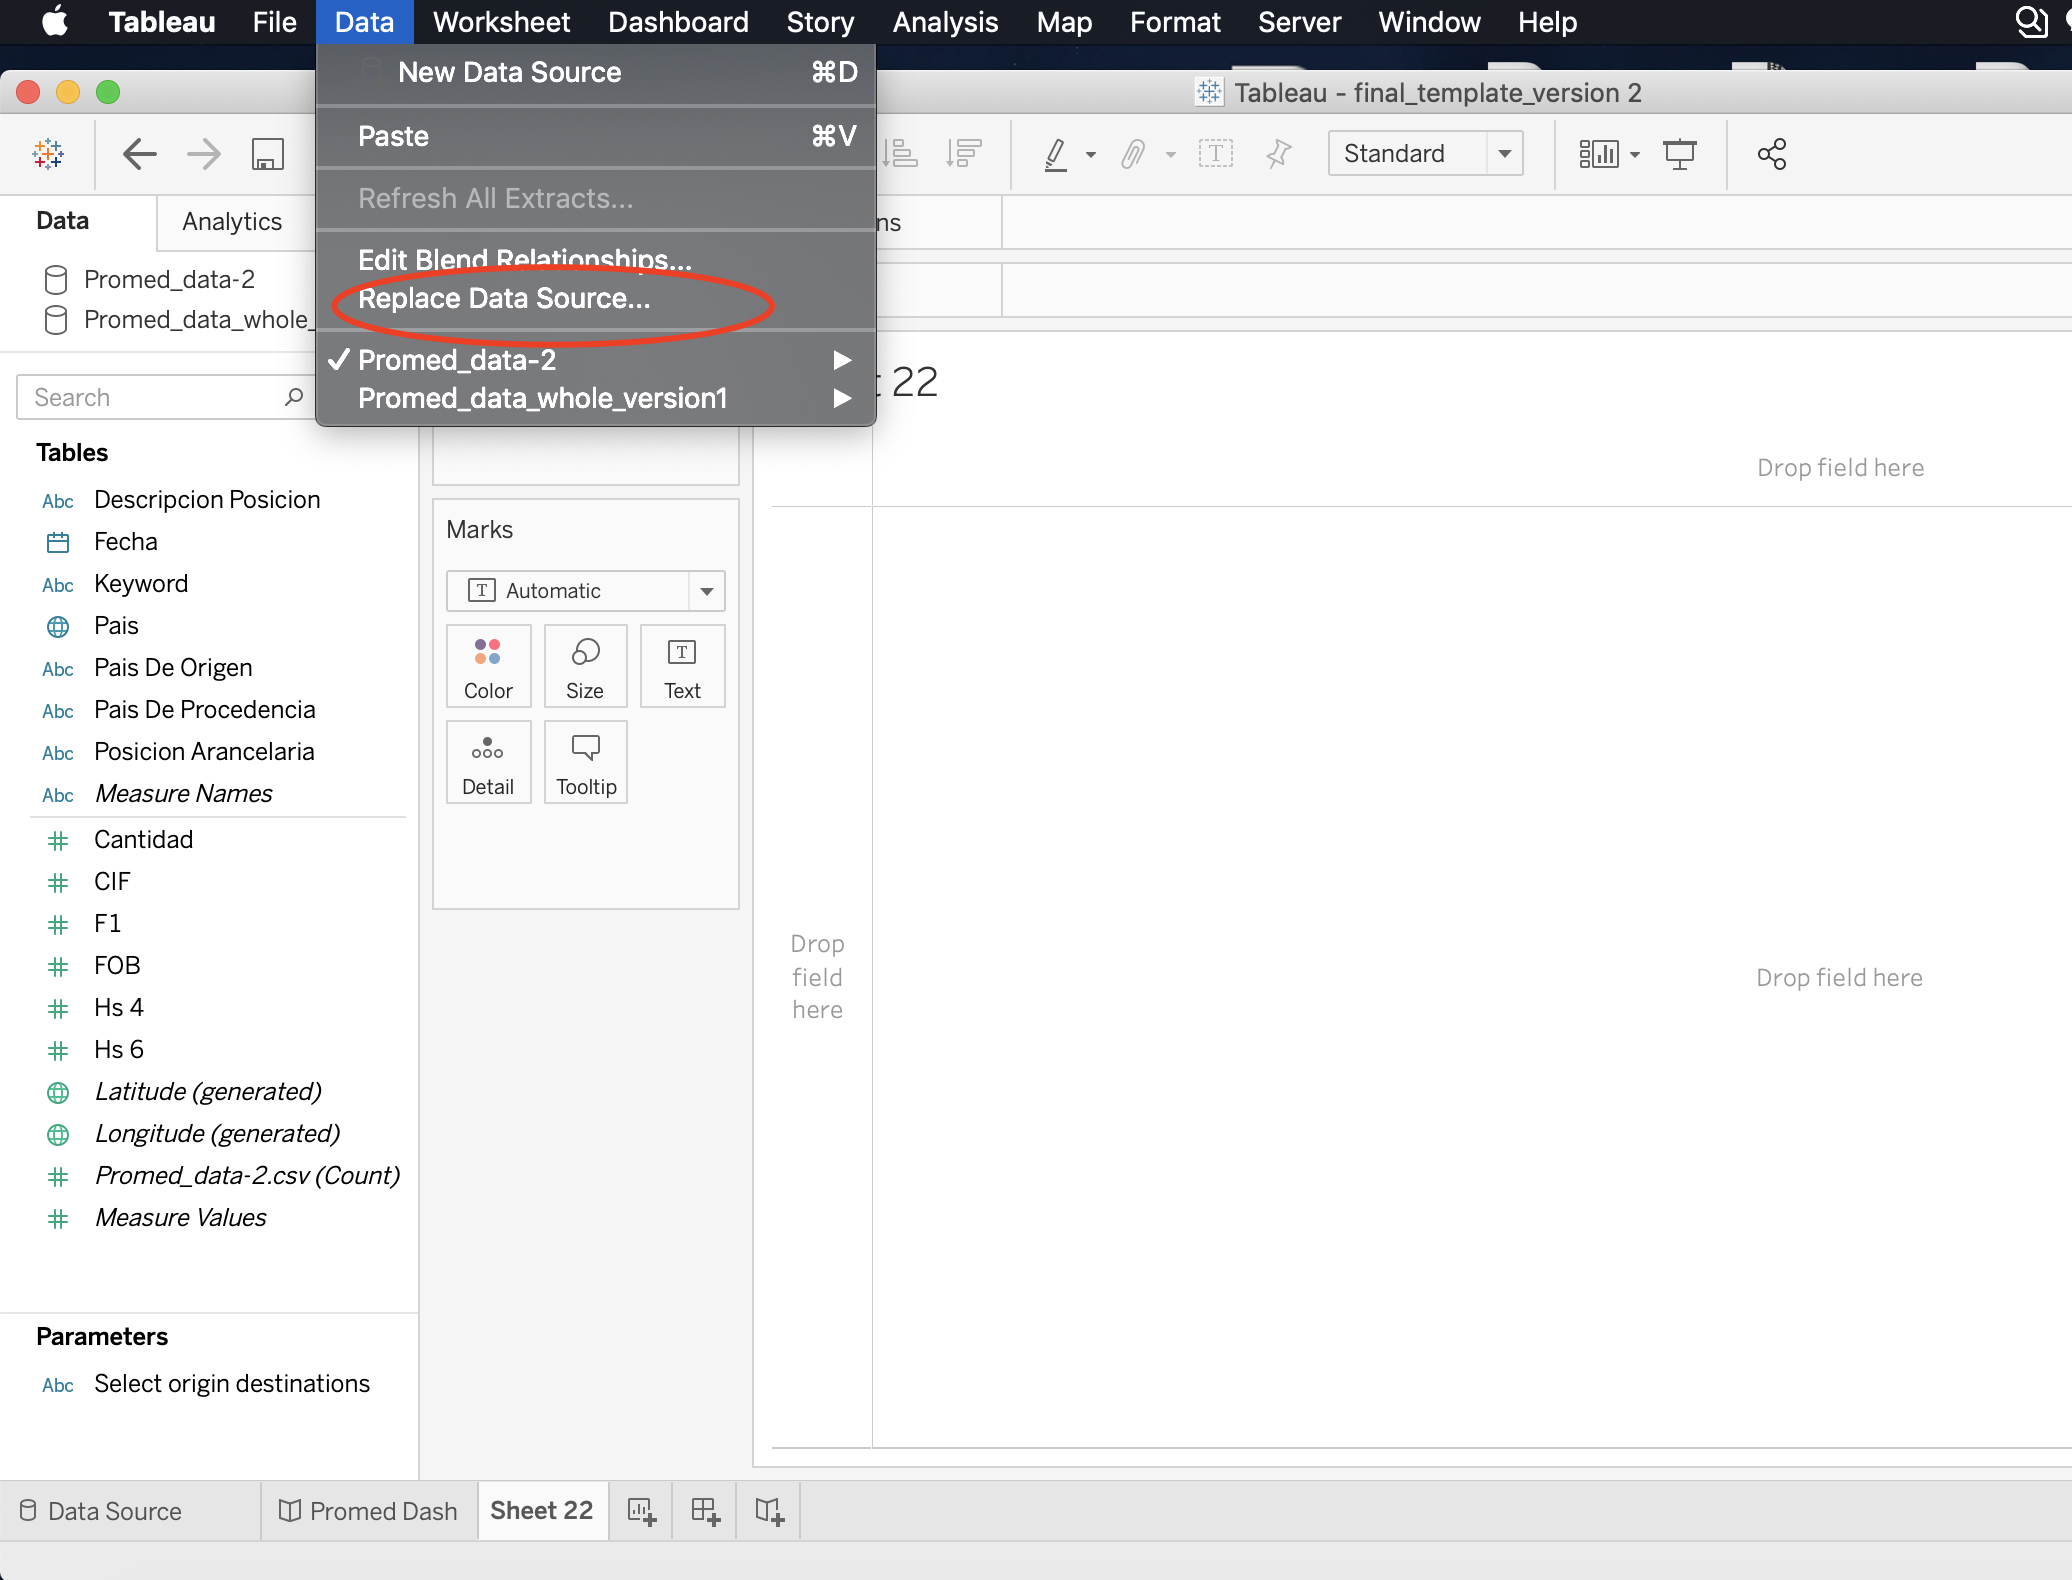

In [5]:
Image(filename='step4.png',width=400, height=500)

Then, you will get the following 'Replace Data Source' box. Check and make sure in the 'Current' is the old data source and **'Replacement' is the new data source**. After checking the files, clik 'OK'.

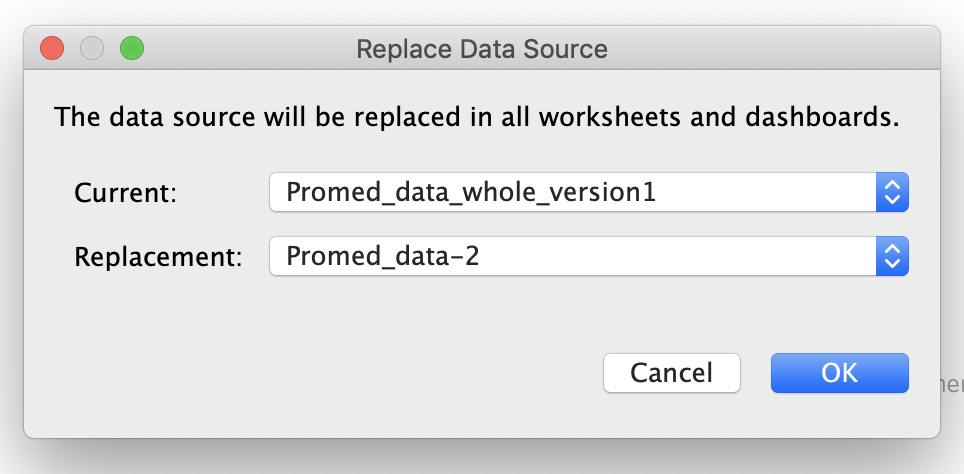

In [6]:
Image(filename='step5.png',width=400, height=400)

Now your workbook is updated. Before exploring the workbook, one last step is just delete the temp worksheet you just created.

**Note: When using the replace method, if a field that is used in a Tableau worksheet is removed from the underlying data of the data source and then the data source is replaced, a warning message displays indicating that the field will be removed from the view and the worksheet will not display correctly because of the missing field.**